## Observations and Insights 

1. Comparing the final tumor volumes of the mice, the results show that Ramicane is the drug regimen that can be considered similar or sightly better to Capomulin's performance. Out of the four drug regimens that were compared, only Infubinol had an outlier.

2. There is a close to equal split between male and female mice. Males were 50.4% and females were 49.6%. This shows that the gender of the mice has no significance with the effectivity of the drug regimen.

3. There is a slightly negative correlation between the average tumor volume and weight of the mice which means that heavier mice would potentially have higher tumor volume.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
pharma_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
# Display the data table for preview
pharma_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(pharma_data['Mouse ID'].unique())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pd.DataFrame(pharma_data,columns=['Mouse ID', 'Timepoint'])
duplicate_micedata = duplicate_mice[duplicate_mice.duplicated()]
duplicate_micedata

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouseID = pharma_data.loc[pharma_data['Mouse ID']== 'g989',:]
duplicatemouseID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharma_dataclean = pharma_data.drop(pharma_data.index[pharma_data['Mouse ID']=='g989'])
pharma_dataclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
totalmiceclean = len(pharma_dataclean['Mouse ID'].unique())
totalmiceclean


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumordata = pharma_dataclean[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
tumorgroup = tumordata.groupby(['Drug Regimen'])

In [8]:

tumor_datamean = tumorgroup['Tumor Volume (mm3)'].mean()
tumor_datamedian = tumorgroup['Tumor Volume (mm3)'].median()
tumor_datavariance = tumorgroup['Tumor Volume (mm3)'].var()
tumor_datastdvar = tumorgroup['Tumor Volume (mm3)'].std()
tumor_datasem = tumorgroup['Tumor Volume (mm3)'].sem()


In [9]:
summary_table = pd.DataFrame({'Mean': tumor_datamean, 'Median': tumor_datamedian, 'Variance': tumor_datavariance, 'Standard Deviation': tumor_datastdvar, 'SEM': tumor_datasem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_data = pharma_dataclean[['Drug Regimen','Mouse ID']]
bar_dataplot = bar_data.groupby(['Drug Regimen'])
bar_dataplotgroup = bar_dataplot.count()
mouse_bar = bar_dataplotgroup[['Mouse ID']]

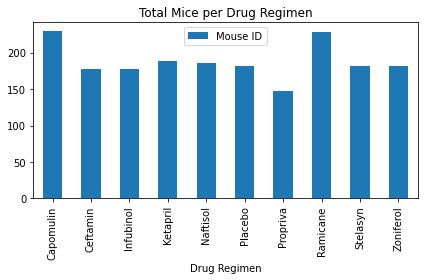

In [72]:
mouse_bar.plot(kind = 'bar', figsize=(6,4))
plt.title("Total Mice per Drug Regimen")
plt.tight_layout()

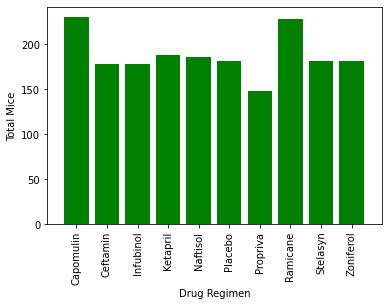

In [73]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_bar))

plt.bar(x_axis, mouse_bar['Mouse ID'], color='green', align = 'center')

ticks = mouse_bar.index
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ticks, rotation = 'vertical');
plt.xlim(-0.95, len(x_axis))
plt.xlabel("Drug Regimen")
plt.ylabel('Total Mice');


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = pharma_dataclean[['Mouse ID', 'Sex']]
mice_gendergroup = mice_gender.groupby(['Sex'])
mice_gendergrp = mice_gendergroup.nunique()
mice_genderdata = mice_gendergrp[['Mouse ID']]


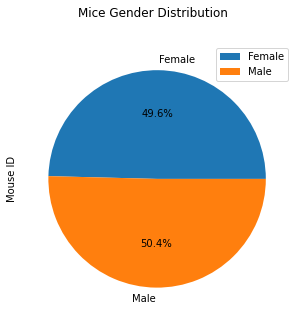

In [14]:
mice_genderdata.plot.pie(subplots = True, title = 'Mice Gender Distribution', figsize =(5,5), autopct="%1.1f%%");

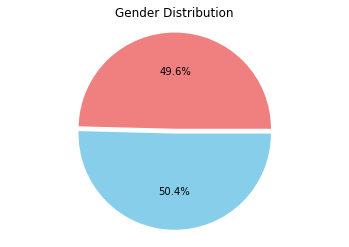

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_genderpie = mice_genderdata['Mouse ID']
explode = (0,0.05)
colors = ['lightcoral','skyblue']
plt.title('Gender Distribution')
plt.pie(mice_genderpie, explode = explode, colors = colors, autopct="%1.1f%%")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens based on the last (greatest) timepoint:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
data_regimen = pharma_dataclean.loc[(pharma_dataclean['Drug Regimen'] =='Capomulin') | (pharma_dataclean['Drug Regimen'] =='Ramicane') |(pharma_dataclean['Drug Regimen'] =='Infubinol') | (pharma_dataclean['Drug Regimen'] =='Ceftamin'), :]


data_table = data_regimen.loc[data_regimen.groupby('Mouse ID')['Timepoint'].agg(pd.Series.idxmax)]
data_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [88]:
tumorvolume_capomulin = data_table.loc[(data_table['Drug Regimen'] =='Capomulin'),['Tumor Volume (mm3)']]
tumorvolume_ramicane = data_table.loc[(data_table['Drug Regimen'] =='Ramicane'),['Tumor Volume (mm3)']]
tumorvolume_infubinol = data_table.loc[(data_table['Drug Regimen'] =='Infubinol'),['Tumor Volume (mm3)']]
tumorvolume_ceftamin = data_table.loc[(data_table['Drug Regimen'] =='Ceftamin'),['Tumor Volume (mm3)']]

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.  - Capomulin
# Determine outliers using upper and lower bounds
capomulinquartile = tumorvolume_capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
caplowerq = capomulinquartile[.25]
capupperq = capomulinquartile[.75]
capiqr = capupperq - caplowerq
caplowerbound = caplowerq - (1.5*capiqr)
capupperbound = capupperq + (1.5*capiqr)
print(f"Values below {caplowerbound} could be outliers.")
print(f"Values above {capupperbound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.  - Ramicane
# Determine outliers using upper and lower bounds
ramicanequartile = tumorvolume_ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramlowerq = ramicanequartile[.25]
ramupperq = ramicanequartile[.75]
ramiqr = ramupperq - ramlowerq
ramlowerbound = ramlowerq - (1.5*ramiqr)
ramupperbound = ramupperq + (1.5*ramiqr)
print(f"Values below {ramlowerbound} could be outliers.")
print(f"Values above {ramupperbound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.  - Infubinol
# Determine outliers using upper and lower bounds
infubinolquartile = tumorvolume_infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inflowerq = infubinolquartile[.25]
infupperq = infubinolquartile[.75]
infiqr = infupperq - inflowerq
inflowerbound = inflowerq - (1.5*infiqr)
infupperbound = infupperq + (1.5*infiqr)
print(f"Values below {inflowerbound} could be outliers.")
print(f"Values above {infupperbound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.  - Ceftamin
# Determine outliers using upper and lower bounds
ceftaminquartile = tumorvolume_ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceflowerq = ceftaminquartile[.25]
cefupperq = ceftaminquartile[.75]
cefiqr = cefupperq - ceflowerq
ceflowerbound = ceflowerq - (1.5*cefiqr)
cefupperbound = cefupperq + (1.5*cefiqr)
print(f"Values below {ceflowerbound} could be outliers.")
print(f"Values above {cefupperbound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


C:\Users\tycoo\AppData\Local\Temp/ipykernel_6692/4205580810.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(regimen);


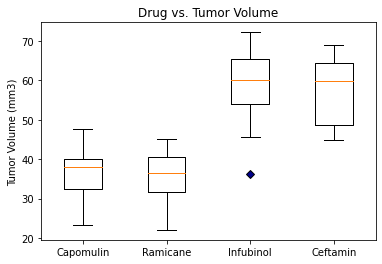

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplotdata = [tumorvolume_capomulin['Tumor Volume (mm3)'], tumorvolume_ramicane['Tumor Volume (mm3)'], tumorvolume_infubinol['Tumor Volume (mm3)'], tumorvolume_ceftamin['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
regimen = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
ax1.set_xticklabels(regimen)
ax1.set_title('Drug vs. Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
outliers = dict(marker = 'D', markerfacecolor = 'darkblue')
ax1.boxplot (boxplotdata, flierprops=outliers);

## Line and Scatter Plots

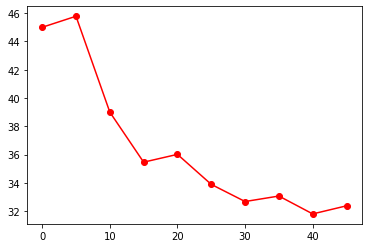

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin - Mouse ID 'r554'
data_regimencapmouse = data_regimen.loc[(pharma_dataclean['Drug Regimen'] =='Capomulin') & (pharma_dataclean['Mouse ID'] =='r554')]
x_axisdata = data_regimencapmouse['Timepoint']
y_axisdata = data_regimencapmouse['Tumor Volume (mm3)']


plt.plot(x_axisdata, y_axisdata,  marker = 'o', color = 'red')
plt.show()

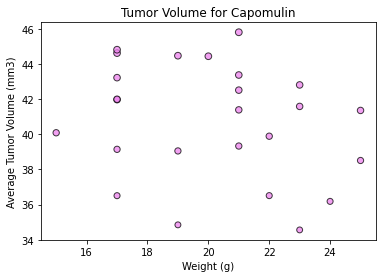

In [81]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data_cap = data_regimen.loc[(pharma_dataclean['Drug Regimen'] =='Capomulin')]

tumorcapgroup = data_cap.groupby(['Mouse ID'])
tumorcapave = tumorcapgroup['Tumor Volume (mm3)'].mean()

xcap = data_cap[['Mouse ID', 'Weight (g)']]
xcapdata = xcap.drop_duplicates(subset=['Mouse ID'])
xscat = xcapdata['Weight (g)']
plt.scatter(xscat, tumorcapave, marker="o", facecolors="violet", edgecolors="black",
            s=tumorcapave, alpha=0.75)


plt.title("Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");


## Correlation and Regression

In [82]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is {round(st.pearsonr(xscat,tumorcapave)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is -0.23


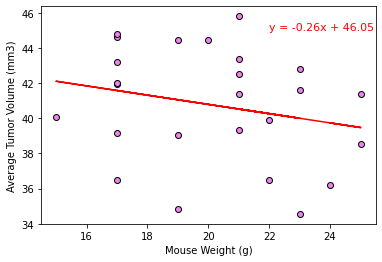

In [83]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xscat, tumorcapave)
regress_values = xscat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xscat,tumorcapave, color='violet', edgecolors= 'black')
plt.plot(xscat,regress_values,"r")
plt.annotate(line_eq,(22,45),fontsize=11,color="r")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
